In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import math, time, random, datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train=pd.read_csv('train health.csv')
test=pd.read_csv('test health.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [48]:
train['Gender']=np.where(train['Gender']== 'Male',1,0).astype(int)

In [6]:
train[['Gender']].head()

,Gender
0,1
1,1
2,1
3,1
4,0


In [7]:
train.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
train.shape

(381109, 12)

In [9]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [10]:
train[numerical_columns].describe()


,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


## Here, Target varaible is response 
Whether the existing person going to purchase  vehicle insurance or not

0    334399
1     46710
Name: Response, dtype: int64

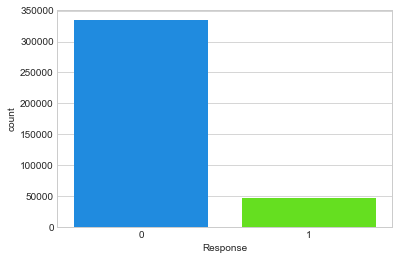

In [11]:
sns.countplot(x='Response',data=train,palette=('gist_rainbow_r'))
train['Response'].value_counts()

In [12]:
train['Age_bin']=pd.cut(train['Age'],bins=5)

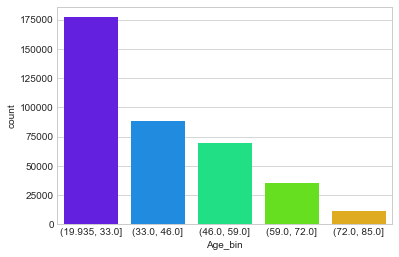

In [13]:
sns.countplot(x='Age_bin',data=train,palette='gist_rainbow_r')

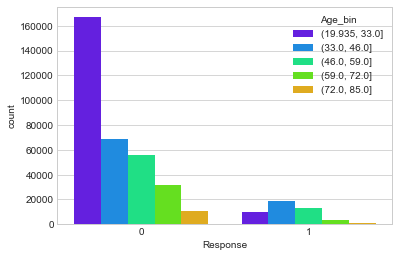

In [14]:
sns.countplot(x='Response',hue='Age_bin',data=train,palette=('gist_rainbow_r'))

In [15]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,"(33.0, 46.0]"
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,"(72.0, 85.0]"
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,"(46.0, 59.0]"
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,"(19.935, 33.0]"
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,"(19.935, 33.0]"


In [16]:
train.drop('Age_bin',axis=1,inplace=True)

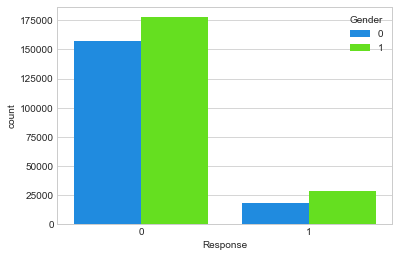

In [17]:
sns.countplot(x='Response',hue='Gender',data=train,palette='gist_rainbow_r')

1    380297
0       812
Name: Driving_License, dtype: int64

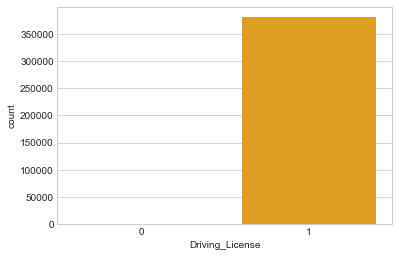

In [18]:
sns.countplot(x='Driving_License',data=train,palette='autumn')
train['Driving_License'].value_counts()

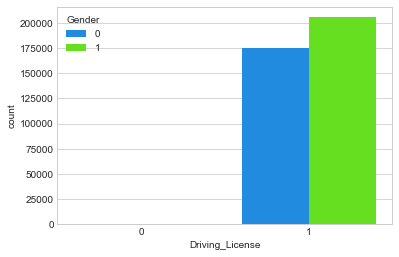

In [19]:
sns.countplot(x='Driving_License',hue='Gender',data=train,palette='gist_rainbow_r')

In [20]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

0    206481
1    174628
Name: Previously_Insured, dtype: int64

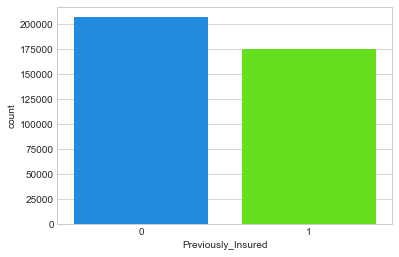

In [21]:
sns.countplot(x='Previously_Insured',data=train,palette='gist_rainbow_r')
train.Previously_Insured.value_counts()

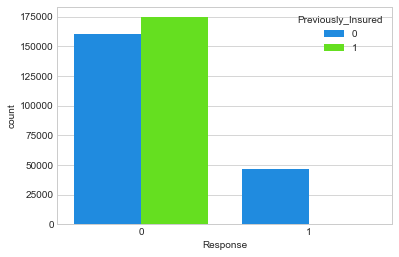

In [22]:
sns.countplot(x='Response',hue='Previously_Insured',data=train,palette='gist_rainbow_r')

In [23]:
#train.groupby(['Response'])['Previously_Insured'].count().to_frame().reset_index()

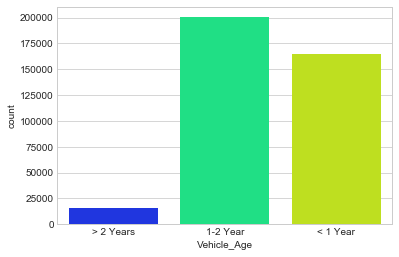

In [24]:
sns.countplot(x='Vehicle_Age',data=train,palette='gist_rainbow_r')

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

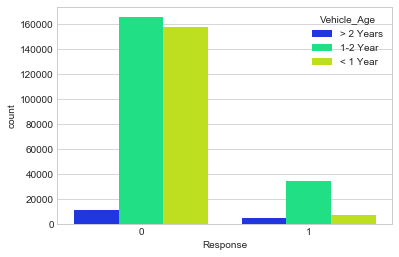

In [25]:
sns.countplot(x='Response',hue='Vehicle_Age',data=train,palette='gist_rainbow_r')
train['Vehicle_Age'].value_counts()

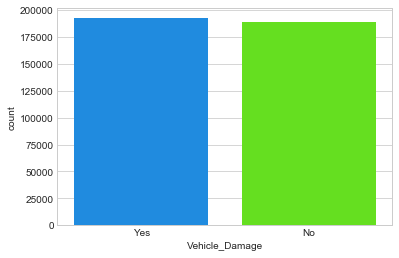

In [26]:
sns.countplot(x='Vehicle_Damage',data=train,palette='gist_rainbow_r')

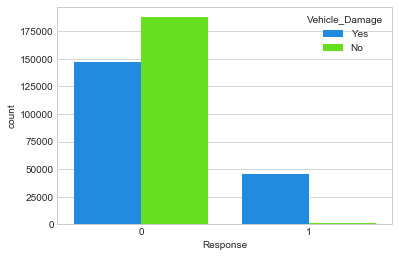

In [27]:
sns.countplot(x='Response',hue='Vehicle_Damage',data=train,palette='gist_rainbow_r')


In [28]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

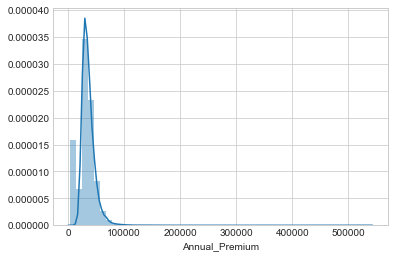

In [29]:
sns.distplot(train.Annual_Premium)

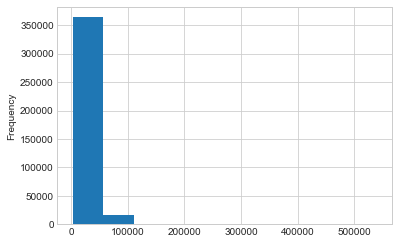

In [30]:
train.Annual_Premium.plot.hist()

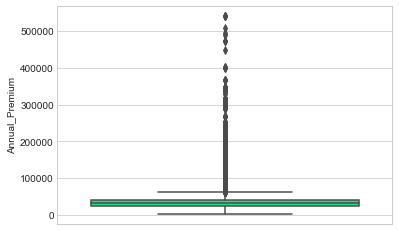

In [31]:
sns.boxplot(y='Annual_Premium',data=train,palette='gist_rainbow_r')

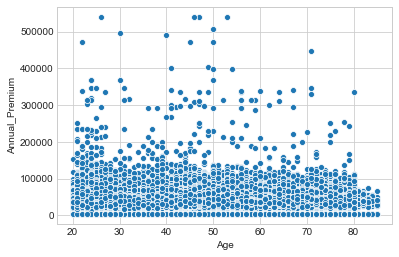

In [32]:
sns.scatterplot(x='Age',y='Annual_Premium',data=train)

In [33]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
            'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [34]:
train.Vehicle_Age.dtype

dtype('O')

In [35]:
train=pd.get_dummies(train,drop_first=True)

In [51]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype(int)
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype(int)
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype(int)

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [38]:
train=train.drop('id',axis=1)

In [58]:
for column in cat_feat:
    train[column] = train[column].astype('int')


In [40]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


In [41]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [42]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [43]:
id=test.id

In [45]:
test=test.drop('id',axis=1)


In [59]:
train.dtypes

Gender                      int32
Age                       float64
Driving_License             int32
Region_Code                 int32
Previously_Insured          int32
Annual_Premium            float64
Policy_Sales_Channel        int32
Vintage                   float64
Vehicle_Age_lt_1_Year       int32
Vehicle_Age_gt_2_Years      int32
Vehicle_Damage_Yes          int32
dtype: object

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [62]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}
clf=RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [63]:
y_pred=model.predict(x_test)


In [65]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

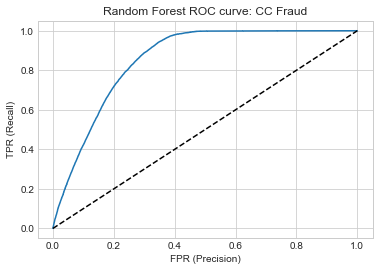

Area under curve (AUC):  0.8549962616476294


In [69]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))